In [1]:
import numpy as np, xarray as xr, matplotlib.pyplot as plt, pandas as pd, s3fs, xesmf, time
from utils import *
import dask.array as da
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

%load_ext autoreload
%autoreload 2

s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", 
                       client_kwargs=dict(endpoint_url="https://rgw.met.no"))

In [6]:
client.close()

In [2]:
cluster = LocalCluster(n_workers=16, memory_limit='20GB') #16 is best (matches number of cores)
client = Client(cluster)

2022-11-03 20:34:38,616 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-sp6cj4mw', purging
2022-11-03 20:34:38,616 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-c1v8mknw', purging
2022-11-03 20:34:38,617 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-fbmrff0h', purging
2022-11-03 20:34:38,617 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-3wxvz2pf', purging
2022-11-03 20:34:38,617 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-4w9u72dj', purging
2022-11-03 20:34:38,617 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-q73f9m4f', purging
2022-11-03 20:34:38,617 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-zx0erygt', purging

In [44]:
#tosBS = clip_to_region(get_bucket_data('tos', thing='Omon', model='NorESM2-LM', experiment='historical'))
#SI = clip_to_region(get_bucket_data('siconc', thing='SImon', model='NorESM2-LM', experiment='historical'))

# Temperature

In [ ]:
tos_anomaly = time_anomaly(tosBS, 0, 12*30, -12*30, -1)
tos_anomaly.plot()

In [ ]:
tosBSmean = regional_average(tosBS.tos.isel(time=slice(-12*70, -1)), model='NorESM2-LM')
tosBSmean.isel(time=slice(-12*50, -1)).plot(x='time')

# Sea Ice

In [ ]:
SImean = regional_average(SI, model='NorESM-LM')

SIMarch = SI.groupby('time.month')[3]
SIMarchSpatialMean = regional_average(SIMarch, areacello.areacello)

SISeptember = SI.groupby('time.month')[9]
SISeptemberSpatialMean = regional_average(SISeptember, areacello.areacello)

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,8))

SIMarchSpatialMean.isel(time=slice(-12*65, -1)).plot(ax=ax[0,0])
SISeptemberSpatialMean.isel(time=slice(-12*65, -1)).plot(ax=ax[0,1])

time_anomaly(SIMarch, 0, 12*30, -12*30, -1).plot(ax=ax[1,0])
time_anomaly(SISeptember, 0, 12*30, -12*30, -1).plot(ax=ax[1,1])

plt.show()

In [ ]:
SImeanMarch = SImean.groupby('time.month')[3]
SImeanSeptember = SImean.groupby('time.month')[9]
SImeanMarch.plot()
SImeanSeptember.plot()

# Chlorofyll

In [6]:
start = time.time()
chlos = clip_to_months(clip_to_region(get_bucket_data('chlos', time_res='daily', thing='Oday', 
                                       experiment='historical', last_n_files=2)), 4, 8)
print(time.time() - start)

Request: s3://escience2022/Ada/daily/chlos_Oday_NorESM2-LM_historical_*.nc
88.26456665992737


In [7]:
chlos_mean = regional_average(chlos['chlos'])

Found local areacello NetCDF


In [8]:
start = time.time()
with ProgressBar():
    chlos_mean.compute()
print(time.time() - start)

38.69058918952942


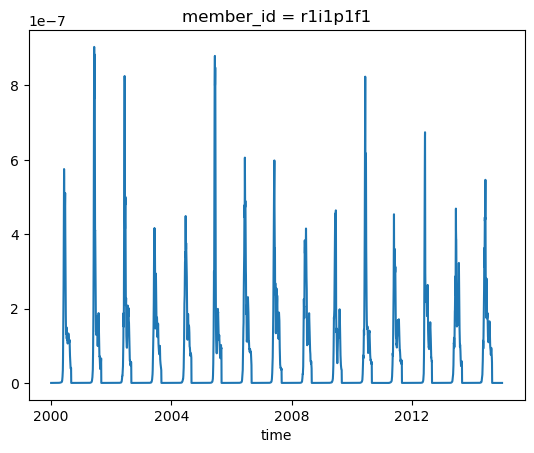

In [9]:
chlos_mean.plot()

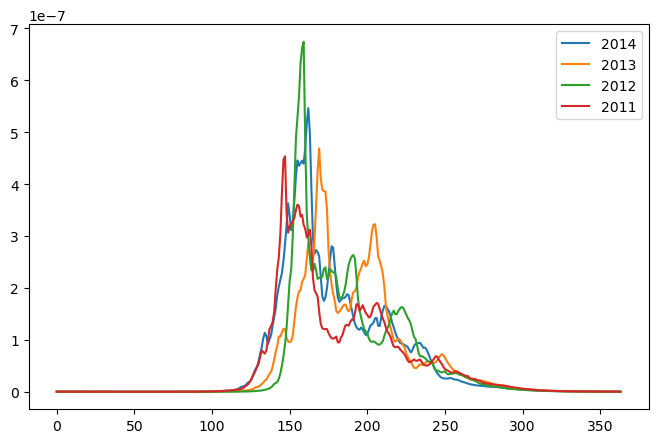

30.77193307876587


In [15]:
start = time.time()
fig, ax = plt.subplots(figsize=(8, 5))

[ax.plot(np.arange(364), chlos_mean.isel(time=slice(-(i+1)*365, -i*365-1)), label=2014-i) for i in range(4)]

#chlos_mean.chlos.isel(time=slice(-365, -1)).plot(ax=ax, color='r', label='2014')
#chlos_mean.chlos.isel(time=slice(-2*365, -365)).plot(ax=ax, color='g', label='2013')
#chlos_mean.chlos.isel(time=slice(-3*365, -2*365)).plot(ax=ax, color='b', label='2012')
#chlos_mean.chlos.isel(time=slice(-4*365, -3*365)).plot(ax=ax, color='y', label='2011')
ax.legend()
plt.show()
print(time.time() - start)

månedlig noresm chlos for å se peak, plotte oppå /OBS-ESACCI-OC/

For NorESM2 chlorophyll, time by 10 to get total mass when integrating for surface layer

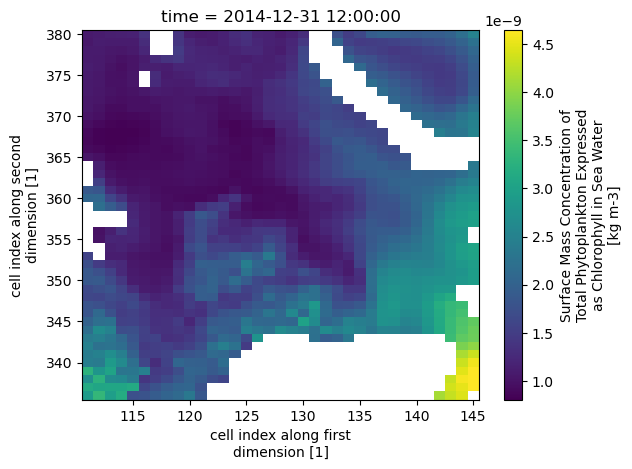

In [3]:
chlos_monthly = get_bucket_data('chlos'